# Initial data exploration

### Overview

* This notebook carries out initial exploration and cleaning of the three main datasets:
    1. NYC graffiti report
        - https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking-Map-/v9sd-nunw
    2. NYPD complaints data
        - https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn

### Setup

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load the data sets

### 1. Graffiti dataset

* Source: [https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking-Map-/v9sd-nunw]



In [6]:
graffiti_df = pd.read_csv('../data/graffiti.csv')

In [7]:
graffiti_df.shape

(759, 19)

* 759 rows (observations)
* 19 columns (variables)


Take a random sample of 50 rows to get a sense of the data

In [8]:
graffiti_df.sample(50)

,INCIDENT_ADDRESS,BOROUGH,COMMUNITY_BOARD,POLICE_PRECINCT,CITY_COUNCIL_DISTRICT,BBL,CREATED_DATE,STATUS,RESOLUTION_ACTION,CLOSED_DATE,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,ZIP_CODE,CENSUS_TRACT,BIN,NTA,LOCATION
18,212 EAST 111 STREET,MANHATTAN,11 MANHATTAN,Precinct 23,8.0,1.016600e+09,12/19/2021,Open,Graffiti Reported,NaN,1000358.0,228750.0,40.794528,-73.941825,10029.0,180.0,1052483.0,East Harlem North,"(40.794528, -73.941825)"
638,480 LENOX AVENUE,MANHATTAN,10 MANHATTAN,Precinct 32,9.0,1.017300e+09,09/02/2021,Open,Site downloaded for cleaning,NaN,1000447.0,235564.0,40.813172,-73.941527,10037.0,212.0,1053897.0,Central Harlem North-Polo Grounds,"(40.813172, -73.941527)"
192,2712 8 AVENUE,MANHATTAN,10 MANHATTAN,Precinct 32,9.0,1.020300e+09,11/05/2021,Open,Site downloaded for cleaning,NaN,1000231.0,238889.0,40.822357,-73.942259,10030.0,232.0,1060439.0,Central Harlem North-Polo Grounds,"(40.822357, -73.942259)"
673,13 MARKET STREET,MANHATTAN,03 MANHATTAN,Precinct 5,1.0,1.002800e+09,08/27/2021,Open,Site downloaded for cleaning,NaN,985761.0,199199.0,40.713432,-73.994550,10002.0,8.0,1003409.0,Chinatown,"(40.713432, -73.99455)"
347,281 BLEECKER STREET,MANHATTAN,02 MANHATTAN,Precinct 6,3.0,1.005900e+09,10/07/2021,Open,Graffiti Reported,NaN,983333.0,205886.0,40.731786,-74.003309,10014.0,67.0,1010152.0,West Village,"(40.731786, -74.003309)"
630,193 2 AVENUE,MANHATTAN,03 MANHATTAN,Precinct 9,2.0,1.004688e+09,10/19/2021,Open,Graffiti Reported,NaN,988159.0,205620.0,40.731056,-73.985896,10003.0,40.0,1006882.0,East Village,"(40.731056, -73.985896)"
746,112 BOWERY,MANHATTAN,02 MANHATTAN,Precinct 5,1.0,1.002390e+09,11/22/2021,Open,Site downloaded for cleaning,NaN,985623.0,200873.0,40.718027,-73.995047,10013.0,41.0,1003127.0,SoHo-TriBeCa-Civic Center-Little Italy,"(40.718027, -73.995047)"
274,209 BOWERY,MANHATTAN,03 MANHATTAN,Precinct 5,1.0,1.004250e+09,10/04/2021,Open,Site downloaded for cleaning,NaN,986024.0,202109.0,40.721419,-73.993600,10002.0,18.0,1005682.0,Chinatown,"(40.721419, -73.9936)"
275,70 WEST 95 STREET,MANHATTAN,07 MANHATTAN,Precinct 24,6.0,1.012080e+09,08/30/2021,Open,Site downloaded for cleaning,NaN,992864.0,228023.0,40.791952,-73.967483,10025.0,181.0,1079519.0,Upper West Side,"(40.791952, -73.967483)"
599,57 DIVISION STREET,MANHATTAN,03 MANHATTAN,Precinct 5,1.0,1.002810e+09,12/15/2021,Open,Site to be cleaned.,NaN,985854.0,199493.0,40.714184,-73.995083,10002.0,8.0,1003508.0,Chinatown,"(40.714184, -73.995083)"


#### Understanding Each Variable

1. `INCIDENT_ADDRESS` - Street address of reported graffiti
1. `BOROUGH` - there are 5 boroughs in New York City, but we are only focusing on Manhattan
1. `COMMUNITY_BOARD` - Manhattan has 12 community boards, which group multiple neighborhoods
1. `POLICE_PRECINCT` - A geographical area patrolled by a police force
1. `CITY_COUNCIL_DISTRICT` - differentiates areas that are are each represented by an elected Council Member
1. `BBL` - stands for Borough-Block-Lot:parcel numbers that identify the location of buildings or properties
1. `CREATED_DATE` - when the report was made
1. `STATUS` - whether the case is open or not 
1. `RESOLUTION_ACTION` - what was done following the reporting (cleaning?)
1. `CLOSED_DATE` - NaN for this data set, but the date that the case was terminated
1. `X_COORDINATE` - a value on the horizontal axis describing the location of the incident
1. `Y_COORDINATE` - a value on the vertical axis describing the location of the incident 
1. `LATITUDE` - the angular distance of a place north or south of the earth's equator
1. `LONGITUDE` - the angular distance of a place east or west of the meridian 
1. `ZIP_CODE` - five digits that are at the end of a postal address to help with sorting mail
1. `CENSUS_TRACT` - geographic region defined for the purpose of taking a census
1. `BIN` - stands for Building Identification Number: a unique identifier for each NYC building
1. `NTA` - stands for Neighborhood tabulation areas: created  to project populations at a small area level
1. `LOCATION` - latitude and longitude coordinates

#### Explore the distribution of values

* Work through each of the variables and look at the distribution of values
* It looks like the location ones are categorical data so can use the `.value_counts()` function

In [9]:
graffiti_df['BOROUGH'].value_counts(dropna=False)

MANHATTAN    759
Name: BOROUGH, dtype: int64

* These data only cover `MANHATTAN` and none of the other boroughs. This was a deliberate decision so that we could make a huge data set much more digestible. This way, it will be easier to analyze trends.

In [10]:
graffiti_df['COMMUNITY_BOARD'].value_counts(dropna=False)

03 MANHATTAN             290
02 MANHATTAN             147
10 MANHATTAN             106
04 MANHATTAN              36
08 MANHATTAN              28
09 MANHATTAN              27
01 MANHATTAN              23
07 MANHATTAN              21
06 MANHATTAN              20
11 MANHATTAN              19
12 MANHATTAN              15
05 MANHATTAN              14
Unspecified MANHATTAN     13
Name: COMMUNITY_BOARD, dtype: int64

This distribution shows the number of reported graffiti incidents in each community board area. See above for the definition of a community board. The community board with the most reported cases of graffiti, community board 3, is comprised of Tompkins Square, East Village, Lower East Side, Chinatown, and Two Bridges. This overlaps with police precincts 5, 7, and 9. 

- See: [https://www.nyc.gov/site/cau/community-boards/manhattan-boards.page]

In [11]:
graffiti_df['POLICE_PRECINCT'].value_counts(dropna=False)

Precinct 9     138
Precinct 5     118
Precinct 7      94
Precinct 1      63
Precinct 28     54
Precinct 32     52
Precinct 6      47
Precinct 19     28
Precinct 18     26
Precinct 13     21
Precinct 30     21
Precinct 24     18
Unspecified     16
Precinct 17     13
Precinct 23     11
Precinct 33     10
Precinct 25      8
Precinct 10      6
Precinct 26      6
Precinct 34      5
Precinct 20      3
Precinct 14      1
Name: POLICE_PRECINCT, dtype: int64

- Unsurprising given the information above, the precincts with the highest number of reports are precincts 5, 7, and 9. Precinct 9, home to the East Village, and Tompkins Square Park, had the most overall reports at 138.
    - See: [https://www.nyc.gov/site/nypd/bureaus/patrol/precincts/9th-precinct.page]

In [12]:
graffiti_df['ZIP_CODE'].value_counts(dropna=False)

10002.0    155
10009.0     74
10013.0     67
10012.0     65
10003.0     58
10027.0     46
10014.0     27
10031.0     21
10026.0     19
10030.0     19
10025.0     17
NaN         17
10019.0     14
10001.0     14
10039.0     14
10128.0     13
10037.0     13
10029.0     13
10036.0     12
10016.0     11
10011.0     10
10032.0      9
10038.0      9
10035.0      7
10028.0      5
10065.0      5
10021.0      4
10024.0      4
10017.0      4
10033.0      3
10022.0      3
10034.0      2
10010.0      2
10075.0      1
10040.0      1
10018.0      1
Name: ZIP_CODE, dtype: int64

* Note 17 observations with no zipcode recorded (`NaN`)

In [13]:
graffiti_df['STATUS'].value_counts(dropna=False)

Open      756
Closed      3
Name: STATUS, dtype: int64

- The overwhelming majority of cases are open, which typically means the case is still being investigated. Because graffiti is a low stakes crime, and it is extremely difficult to catch the culprit, it makes sense that only 3 cases were pursued until closing.

In [14]:
graffiti_df['CITY_COUNCIL_DISTRICT'].value_counts(dropna=False)

1.0     279
2.0     152
9.0     117
3.0      84
7.0      34
5.0      21
4.0      21
6.0      15
NaN      13
8.0      13
10.0     10
Name: CITY_COUNCIL_DISTRICT, dtype: int64

* Note 13 observations with no value recorded (`NaN`)
* It is likely that those who reported don't even know the city council district corresponding to where they reported. This is even more likely if they made the observation outside of the district where they live.

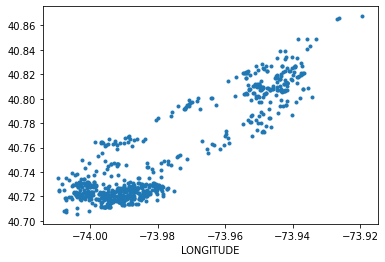

In [15]:
graffiti_df.plot(x='LONGITUDE', y='LATITUDE', style='.', legend=False)
plt.show()

* Though this graph does not show the map of Manhattan below it, using my knowledge of the city, I can tell that the space in the middle is Central Park and the densest tip is the lower tip of Manhattan.


### Some Manhattan maps

* https://github.com/codeforgermany/click_that_hood/blob/main/public/data/manhattan.geojson
* https://github.com/ResidentMario/geoplot-data/blob/master/nyc-police-precincts.geojson

Importing maps so that we can get the outline according to neighborhoods and precincts for better understanding of the data points above!

In [16]:
manhattan_gdf=gpd.read_file('../data/manhattan.geojson')

In [17]:
manhattan_gdf.shape

(37, 5)

- So, there are 37 neighborhoods in Manhattan

In [18]:
manhattan_gdf

,cartodb_id,name,created_at,updated_at,geometry
0,9,Battery Park City,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.01426 ..."
1,50,Central Park,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.94966 40.79707, -73.94964 ..."
2,52,Chelsea,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99346 40.75219, -73.98794 ..."
3,54,Chinatown,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99999 40.71798, -73.99864 ..."
4,57,Civic Center,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99799 40.71272, -73.99777 ..."
5,84,East Harlem,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.93383 40.81952, -73.93383 ..."
6,87,East Village,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99070 40.73478, -73.98255 ..."
7,91,Ellis Island,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.04166 40.69645, -74.04367 ..."
8,98,Financial District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.00861 ..."
9,100,Flatiron District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.98338 40.74137, -73.98474 ..."


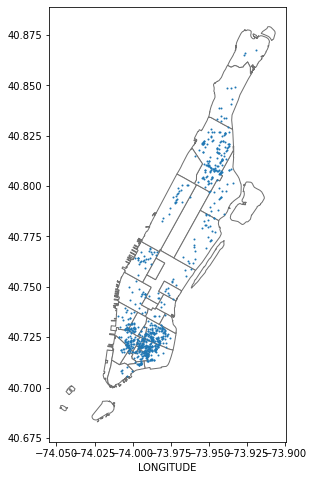

In [19]:
fig, ax = plt.subplots(figsize=(6,8))
base=manhattan_gdf.plot(color='white', edgecolor='#707070', ax=ax)
graffiti_df.plot(x='LONGITUDE', y='LATITUDE', style='.', legend=False, ax=base, markersize=2)
plt.show()

- Now, we can get a better feel for which neighborhoods in Manhattan have greater reported incidents of graffiti

#### Police precincts


In [17]:
nypd_gdf = gpd.read_file('../data/nyc-police-precincts.geojson')

In [18]:
nypd_gdf.shape

(77, 4)

- This shows that there are 77 precincts in all of NYC, but there are only 22 in Manhattan. The Manhattan precincts go up to 34, and some do not have numerical labels (Midtown South Precinct, Midtown North Precinct, and Central Park Precinct)

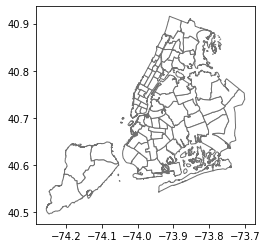

In [19]:
nypd_gdf.plot(color='white', edgecolor='#707070')
plt.show()

* This covers all the boroughs so need to subset for just Manhattan

In [20]:
nypd_gdf['precinct'].unique()

array(['1', '5', '6', '7', '9', '10', '13', '14', '17', '18', '19', '20',
       '22', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '52',
       '60', '61', '62', '63', '66', '67', '68', '69', '70', '71', '72',
       '73', '75', '76', '77', '78', '79', '81', '83', '84', '88', '90',
       '94', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '120',
       '121', '122', '123'], dtype=object)

* Get the numbers from the graffiti dataframe

In [21]:
precincts_to_keep = graffiti_df['POLICE_PRECINCT'].str.replace('Precinct ','')
precincts_to_keep

0                5
1      Unspecified
2                9
3      Unspecified
4      Unspecified
          ...     
754             10
755             28
756              7
757              9
758              1
Name: POLICE_PRECINCT, Length: 759, dtype: object

<Axes: >

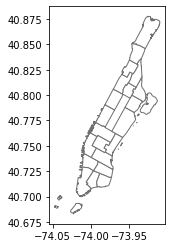

In [22]:
manhattan_precincts=nypd_gdf['precinct'].isin(precincts_to_keep)

nypd_gdf[manhattan_precincts].plot(color='white', edgecolor='#707070')

### 2. Crime dataset

* Source: [https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn]


In [23]:
crime_df = pd.read_csv('../data/crime_updated.csv', low_memory=True)

In [24]:
crime_df.shape

(96805, 36)

- WOW... 96,805 reported incidents. This is a huge data set.

this is the dataset that hasn't been cleaned***

In [25]:
crime_df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,240043562,5.0,MANHATTAN,12/16/2021,00:00:00,02/03/2022,09:30:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,985111,201295,40.719186,-73.996891,"(40.719186, -73.996891)",POINT (-73.996891 40.719186)
1,238496479,14.0,MANHATTAN,12/31/2021,20:40:00,12/31/2021,21:45:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,985679,213954,40.753939,-73.994844,"(40.75393917, -73.99484365)",POINT (-73.99484365 40.75393917)
2,240159497,17.0,MANHATTAN,10/15/2021,11:00:00,01/08/2022,11:45:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,992795,213205,40.751873,-73.969157,"(40.751873, -73.969157)",POINT (-73.969157 40.751873)
3,240399570,34.0,MANHATTAN,12/15/2021,16:00:00,02/09/2022,09:00:00,COMPLETED,(null),NaN,...,NaN,25-44,WHITE,M,1004317,255023,40.866632,-73.927447,"(40.866632, -73.927447)",POINT (-73.927447 40.866632)
4,239791800,6.0,MANHATTAN,10/07/2021,16:36:00,10/07/2021,17:40:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,985572,207670,40.736683,-73.995228,"(40.736683, -73.995228)",POINT (-73.995228 40.736683)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96800,251191203,19.0,MANHATTAN,09/15/2022,02:13:00,09/15/2022,02:15:00,COMPLETED,(null),NaN,...,NaN,18-24,ASIAN / PACIFIC ISLANDER,F,997528,220243,40.771183,-73.952060,"(40.771183, -73.95206)",POINT (-73.95206 40.771183)
96801,251011943,23.0,MANHATTAN,09/13/2022,20:10:00,09/13/2022,20:11:00,COMPLETED,(null),672.0,...,NaN,UNKNOWN,UNKNOWN,E,999358,226562,40.788526,-73.945439,"(40.788526, -73.945439)",POINT (-73.945439 40.788526)
96802,251223821,19.0,MANHATTAN,09/15/2022,07:21:00,09/15/2022,07:23:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,998835,224879,40.783906,-73.947334,"(40.783906, -73.947334)",POINT (-73.947334 40.783906)
96803,250901807,9.0,MANHATTAN,09/11/2022,09:00:00,09/11/2022,12:22:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,988508,203965,40.726514,-73.984637,"(40.726514, -73.984637)",POINT (-73.984637 40.726514)


In [26]:
complaint_df = pd.read_csv('../data/NYPD_Complaint_Data_Current__Year_To_Date_.csv')

In [27]:
complaint_df.shape

(36554, 18)

In [29]:
complaint_df.sample(10)

,,,,,,,,,,,,,,,,,,FROM BUILDING,"UN""",OTHER,09/11/2022,(null),UNKNOWN,UNKNOWN.1,U,Unnamed: 8,25-44,WHITE HISPANIC,M,1003638,226954,40.789593,-73.929984,"(40.789593, -73.929984)",POINT (-73.929984 40.789593)
252541122,1.0,MANHATTAN,10/13/2022,21:45:00,10/14/2022,07:30:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,107,FELONY,INSIDE,BURGLARY,(null),PATROL BORO MAN SOUTH,213.0,"BURGLARY,COMMERCIAL,NIGHT",FAST FOOD,10/14/2022,(null),UNKNOWN,UNKNOWN,U,NaN,UNKNOWN,UNKNOWN,D,983175,203287,40.724653,-74.003878,"(40.724653, -74.003878)",POINT (-74.003878 40.724653)
254712753,14.0,MANHATTAN,11/27/2022,22:40:00,11/27/2022,22:50:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,(null),PATROL BORO MAN SOUTH,638.0,"HARASSMENT,SUBD 3,4,5",BAR/NIGHT CLUB,11/27/2022,(null),UNKNOWN,UNKNOWN,U,NaN,25-44,UNKNOWN,F,988545,214962,40.756699,-73.984494,"(40.756699, -73.984494)",POINT (-73.984494 40.756699)
254171012,17.0,MANHATTAN,11/15/2022,20:30:00,11/15/2022,20:40:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,106,FELONY,FRONT OF,FELONY ASSAULT,(null),PATROL BORO MAN SOUTH,109.0,"ASSAULT 2,1,UNCLASSIFIED",BAR/NIGHT CLUB,11/15/2022,(null),25-44,WHITE,M,NaN,65+,WHITE,M,992661,214472,40.755351,-73.969640,"(40.755351, -73.96964)",POINT (-73.96964 40.755351)
254224528,17.0,MANHATTAN,11/16/2022,14:05:00,11/16/2022,14:08:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,333.0,"LARCENY,PETIT FROM STORE-SHOPL",CHAIN STORE,11/16/2022,(null),UNKNOWN,WHITE HISPANIC,U,NaN,UNKNOWN,UNKNOWN,D,991654,213389,40.752378,-73.973274,"(40.752378, -73.973274)",POINT (-73.973274 40.752378)
251877068,1.0,MANHATTAN,09/30/2022,18:55:00,09/30/2022,19:02:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,333.0,"LARCENY,PETIT FROM STORE-SHOPL",CHAIN STORE,09/30/2022,(null),UNKNOWN,BLACK,M,NaN,UNKNOWN,UNKNOWN,D,982994,196908,40.707145,-74.004529,"(40.707145, -74.004529)",POINT (-74.004529 40.707145)
252256636,28.0,MANHATTAN,10/07/2022,03:30:00,10/07/2022,03:35:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,(null),PATROL BORO MAN NORTH,339.0,"LARCENY,PETIT FROM OPEN AREAS,",RESTAURANT/DINER,10/08/2022,(null),UNKNOWN,UNKNOWN,U,NaN,UNKNOWN,UNKNOWN,D,998634,232299,40.804272,-73.948043,"(40.804272, -73.948043)",POINT (-73.948043 40.804272)
255853474,6.0,MANHATTAN,12/13/2022,20:10:00,12/13/2022,22:30:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,109,FELONY,INSIDE,GRAND LARCENY,(null),PATROL BORO MAN SOUTH,411.0,"LARCENY,GRAND FROM EATERY, UNATTENDED",RESTAURANT/DINER,12/13/2022,(null),UNKNOWN,UNKNOWN,U,NaN,25-44,WHITE HISPANIC,F,982694,209099,40.740605,-74.005613,"(40.740605, -74.005613)",POINT (-74.005613 40.740605)
253656079,19.0,MANHATTAN,11/05/2022,08:16:00,11/05/2022,08:19:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,(null),PATROL BORO MAN NORTH,333.0,"LARCENY,PETIT FROM STORE-SHOPL",CHAIN STORE,11/05/2022,(null),25-44,WHITE HISPANIC,M,NaN,UNKNOWN,UNKNOWN,D,994836,219126,40.768122,-73.961781,"(40.768122, -73.961781)",POINT (-73.961781 40.768122)
253134563,14.0,MANHATTAN,10/26/2022,07:00:00,10/26/2022,07:10:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,338.0,"LARCENY,PETIT FROM BUILDING,UN",CHAIN STORE,10/26/2022,(null),UNKNOWN,UNKNOWN,U,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,986684,215375,40.757831,-73.991212,"(40.757831, -73.991212)",POINT (-73.991212 40.757831)
254360654,26.0,MANHATTAN,11/17/2022,11:00:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,361,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,(null),PATROL BORO MAN NORTH,639.0,AGGRAVATED HARASSMENT 2,RESIDENCE - APT. HOUSE,11/18/2022,(null),UNKNOWN,BLACK HISPANIC,U,NaN,25-44,WHITE HISPANIC,F,994246,232738,40.805483,-73.963892,"(40.805483, -73.963892)",POINT (-73.963892 40.805483)
